In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import string

In [3]:
MGTOW = pd.read_csv('Comments-Data/MGTOW_Comments.csv')

In [4]:
Comment = MGTOW['Comment']

In [5]:
def process_comment_df(df):
    hist = dict()
    for line in df:
        process_line(line, hist)
    return hist

In [6]:
def process_line(line, hist):
    line = line.replace('-', ' ')
    for word in line.split():
        word = word.strip(string.punctuation + string.whitespace + '..“/:”`´"')
        word = word.lower()
        hist[word] = hist.get(word, 0) + 1

In [7]:
hist = process_comment_df(Comment)

In [8]:
s = pd.Series(list(hist.values()), index=list(hist.keys()))

In [9]:
s = s.sort_values(ascending=False)

In [10]:
num = np.arange(len(hist))

In [11]:
order_of_words = pd.Series(num, index=s.index)

In [12]:
df = pd.DataFrame({'appear':s, 'rank':order_of_words})

In [13]:
df

,appear,rank
the,1287,0
to,968,1
and,877,2
a,790,3
of,736,4
i,506,5
is,496,6
that,461,7
in,434,8
it,360,9


# exredpill

In [14]:
exredpill = pd.read_csv('Comments-Data/exredpill_Comments.csv')

In [15]:
exredpill.head()

,ID,Comment,Author,Score,Parent id,Publish Date
0,chi1gnk,Did many other people at your school/college d...,accacaaccaca,4,t3_25kd9o,2014-05-14 17:36:05
1,chi6vf2,[deleted],[deleted],2,t3_25kd9o,2014-05-14 20:44:56
2,chi9org,Seconding this. What do you think it would tak...,laskuraska,2,t1_chi6vf2,2014-05-14 22:31:07
3,chibx7j,"Personally, I think the best way redpillers co...",[deleted],3,t1_chi6vf2,2014-05-14 23:53:34
4,chic1kd,[deleted],[deleted],1,t1_chibx7j,2014-05-14 23:58:24


In [16]:
date = exredpill['Publish Date']

In [17]:
years = [item[:4] for item in date]

In [18]:
exredpill['year'] = years

In [19]:
exredpill.head()

,ID,Comment,Author,Score,Parent id,Publish Date,year
0,chi1gnk,Did many other people at your school/college d...,accacaaccaca,4,t3_25kd9o,2014-05-14 17:36:05,2014
1,chi6vf2,[deleted],[deleted],2,t3_25kd9o,2014-05-14 20:44:56,2014
2,chi9org,Seconding this. What do you think it would tak...,laskuraska,2,t1_chi6vf2,2014-05-14 22:31:07,2014
3,chibx7j,"Personally, I think the best way redpillers co...",[deleted],3,t1_chi6vf2,2014-05-14 23:53:34,2014
4,chic1kd,[deleted],[deleted],1,t1_chibx7j,2014-05-14 23:58:24,2014


In [20]:
exredpill.groupby('year').sum()

,Score
year,
2014,3006
2015,3205
2016,8442
2017,17934
2018,12373
2019,5011


In [21]:
month = [item[:7] for item in date]

In [22]:
exredpill['month'] = month

In [23]:
exredpill.head()

,ID,Comment,Author,Score,Parent id,Publish Date,year,month
0,chi1gnk,Did many other people at your school/college d...,accacaaccaca,4,t3_25kd9o,2014-05-14 17:36:05,2014,2014-05
1,chi6vf2,[deleted],[deleted],2,t3_25kd9o,2014-05-14 20:44:56,2014,2014-05
2,chi9org,Seconding this. What do you think it would tak...,laskuraska,2,t1_chi6vf2,2014-05-14 22:31:07,2014,2014-05
3,chibx7j,"Personally, I think the best way redpillers co...",[deleted],3,t1_chi6vf2,2014-05-14 23:53:34,2014,2014-05
4,chic1kd,[deleted],[deleted],1,t1_chibx7j,2014-05-14 23:58:24,2014,2014-05


In [24]:
comments_per_month = exredpill.groupby('month').sum()

In [25]:
comments_per_month.head()

,Score
month,
2014-05,97
2014-06,401
2014-07,345
2014-08,50
2014-09,459


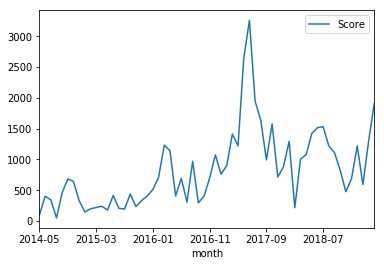

In [26]:
comments_per_month.pivot_table( index='month').plot();

# Analise sentimental

In [72]:
exredpill = exredpill[exredpill.Comment != '[deleted]']

In [73]:
from textblob import TextBlob

In [74]:
sentiment = []
subjectivity = []
for comment in exredpill['Comment']:
    sentiment.append(TextBlob(comment).sentiment[0])
    subjectivity.append(TextBlob(comment).sentiment[1])

In [75]:
exredpill['polarity'] = sentiment
exredpill['subjectivity'] = subjectivity

In [76]:
exredpill.head()

,ID,Comment,Author,Score,Parent id,Publish Date,year,month,polarity,subjectivity
0,chi1gnk,Did many other people at your school/college d...,accacaaccaca,4,t3_25kd9o,2014-05-14 17:36:05,2014,2014-05,0.093750,0.418750
2,chi9org,Seconding this. What do you think it would tak...,laskuraska,2,t1_chi6vf2,2014-05-14 22:31:07,2014,2014-05,-0.066667,0.533333
3,chibx7j,"Personally, I think the best way redpillers co...",[deleted],3,t1_chi6vf2,2014-05-14 23:53:34,2014,2014-05,0.357500,0.434938
5,chic9k5,"Actually, not that many people sent up red fla...",[deleted],7,t1_chi1gnk,2014-05-15 00:07:10,2014,2014-05,-0.026091,0.377381
6,chie456,"&gtUnfortunately, all the pretty girls smoked ...",chinchillazilla54,1,t3_25kd9o,2014-05-15 01:27:10,2014,2014-05,0.216250,0.720324


In [77]:
polarity_serie = exredpill.groupby('month')['polarity'].mean()
subjectivity_serie = exredpill.groupby('month')['subjectivity'].mean()

In [78]:
polarity_serie.head()

month
2014-05    0.060583
2014-06    0.097278
2014-07    0.097239
2014-08    0.109742
2014-09    0.043246
Name: polarity, dtype: float64

In [79]:
subjectivity_serie.head()

month
2014-05    0.499054
2014-06    0.477461
2014-07    0.466069
2014-08    0.500064
2014-09    0.448673
Name: subjectivity, dtype: float64

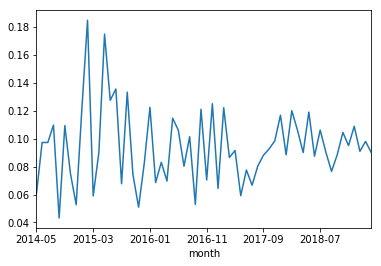

In [80]:
fig, ax = plt.subplots()
polarity_serie.plot();

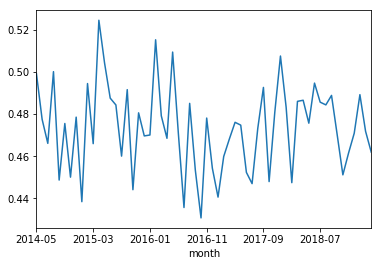

In [81]:
subjectivity_serie.plot();

In [153]:
polarity_serie = exredpill.groupby('year')['polarity'].mean()
subjectivity_serie = exredpill.groupby('year')['subjectivity'].mean()

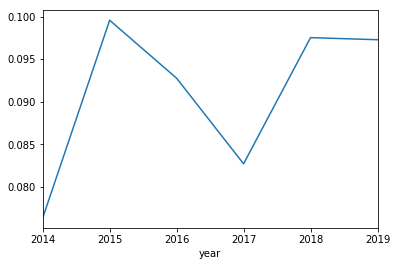

In [155]:
fig, ax = plt.subplots()
polarity_serie.plot();

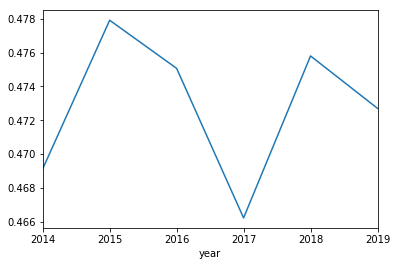

In [156]:
subjectivity_serie.plot();

# Empath

In [82]:
from empath import Empath
lexicon = Empath()

In [83]:
analyze = lexicon.analyze(exredpill['Comment'][0])

In [168]:
analyze

{'help': 0.0,
 'office': 0.0,
 'dance': 0.0,
 'money': 1.0,
 'wedding': 0.0,
 'domestic_work': 0.0,
 'sleep': 0.0,
 'medical_emergency': 0.0,
 'cold': 0.0,
 'hate': 0.0,
 'cheerfulness': 0.0,
 'aggression': 0.0,
 'occupation': 0.0,
 'envy': 0.0,
 'anticipation': 0.0,
 'family': 0.0,
 'vacation': 0.0,
 'crime': 0.0,
 'attractive': 0.0,
 'masculine': 0.0,
 'prison': 0.0,
 'health': 0.0,
 'pride': 0.0,
 'dispute': 0.0,
 'nervousness': 0.0,
 'government': 0.0,
 'weakness': 0.0,
 'horror': 0.0,
 'swearing_terms': 0.0,
 'leisure': 0.0,
 'suffering': 0.0,
 'royalty': 0.0,
 'wealthy': 0.0,
 'tourism': 0.0,
 'furniture': 0.0,
 'school': 0.0,
 'magic': 0.0,
 'beach': 1.0,
 'journalism': 0.0,
 'morning': 0.0,
 'banking': 0.0,
 'social_media': 0.0,
 'exercise': 1.0,
 'night': 0.0,
 'kill': 0.0,
 'blue_collar_job': 0.0,
 'art': 0.0,
 'ridicule': 0.0,
 'play': 0.0,
 'computer': 0.0,
 'college': 0.0,
 'optimism': 0.0,
 'stealing': 0.0,
 'real_estate': 0.0,
 'home': 0.0,
 'divine': 0.0,
 'sexual': 0.0

In [85]:
analyze_word = pd.Series(list(analyze.keys()))
analyze_value = pd.Series(list(analyze.values()))

In [86]:
analyze_series = pd.Series(analyze)

In [87]:
analyze_series.sort_values(ascending=False).head()

appearance    2.0
swimming      1.0
ocean         1.0
exercise      1.0
beach         1.0
dtype: float64

In [88]:
exredpill['Comment'][0]

'Did many other people at your school/college do similar things (i.e. dive into TRP or similar ideologies)?\n\nIn what ways specifically did your views change of women?'

analisar evolução de um empath com o tempo
histograma dos empath

In [89]:
for comment in exredpill['Comment']:
    analyze_series += pd.Series(lexicon.analyze(comment))

In [98]:
sort = analyze_series.sort_values(ascending=False)
data_analyze = pd.DataFrame(sort)

In [132]:
data_analyze.head(10)

,sum,rank
negative_emotion,15636.0,0
speaking,14197.0,1
communication,13203.0,2
positive_emotion,12015.0,3
trust,11089.0,4
friends,10963.0,5
children,9412.0,6
sexual,8798.0,7
love,8469.0,8
optimism,8468.0,9


In [104]:
data_analyze['rank'] = np.arange(len(sort))

In [105]:
data_analyze.head()

,0,rank
negative_emotion,15636.0,0
speaking,14197.0,1
communication,13203.0,2
positive_emotion,12015.0,3
trust,11089.0,4


In [114]:
data_analyze.rename(columns={0:'sum'}, inplace=True)

In [181]:
data_analyze.head()

,sum,rank
negative_emotion,15636.0,0
speaking,14197.0,1
communication,13203.0,2
positive_emotion,12015.0,3
trust,11089.0,4


In [116]:
exredpill.head()

,ID,Comment,Author,Score,Parent id,Publish Date,year,month,polarity,subjectivity
0,chi1gnk,Did many other people at your school/college d...,accacaaccaca,4,t3_25kd9o,2014-05-14 17:36:05,2014,2014-05,0.093750,0.418750
2,chi9org,Seconding this. What do you think it would tak...,laskuraska,2,t1_chi6vf2,2014-05-14 22:31:07,2014,2014-05,-0.066667,0.533333
3,chibx7j,"Personally, I think the best way redpillers co...",[deleted],3,t1_chi6vf2,2014-05-14 23:53:34,2014,2014-05,0.357500,0.434938
5,chic9k5,"Actually, not that many people sent up red fla...",[deleted],7,t1_chi1gnk,2014-05-15 00:07:10,2014,2014-05,-0.026091,0.377381
6,chie456,"&gtUnfortunately, all the pretty girls smoked ...",chinchillazilla54,1,t3_25kd9o,2014-05-15 01:27:10,2014,2014-05,0.216250,0.720324


In [118]:
exredpill['negative_emotion'] = [lexicon.analyze(comment)['negative_emotion'] for comment in exredpill['Comment']]

In [133]:
exredpill['hate'] = [lexicon.analyze(comment)['hate'] for comment in exredpill['Comment']]

In [182]:
exredpill['violence'] = [lexicon.analyze(comment)['violence'] for comment in exredpill['Comment']]

In [183]:
exredpill['death'] = [lexicon.analyze(comment)['death'] for comment in exredpill['Comment']]

In [184]:
exredpill.head()

,ID,Comment,Author,Score,Parent id,Publish Date,year,month,polarity,subjectivity,negative_emotion,hate,violence,death
0,chi1gnk,Did many other people at your school/college d...,accacaaccaca,4,t3_25kd9o,2014-05-14 17:36:05,2014,2014-05,0.093750,0.418750,0.0,0.0,0.0,0.0
2,chi9org,Seconding this. What do you think it would tak...,laskuraska,2,t1_chi6vf2,2014-05-14 22:31:07,2014,2014-05,-0.066667,0.533333,0.0,0.0,1.0,0.0
3,chibx7j,"Personally, I think the best way redpillers co...",[deleted],3,t1_chi6vf2,2014-05-14 23:53:34,2014,2014-05,0.357500,0.434938,2.0,1.0,1.0,0.0
5,chic9k5,"Actually, not that many people sent up red fla...",[deleted],7,t1_chi1gnk,2014-05-15 00:07:10,2014,2014-05,-0.026091,0.377381,2.0,0.0,1.0,1.0
6,chie456,"&gtUnfortunately, all the pretty girls smoked ...",chinchillazilla54,1,t3_25kd9o,2014-05-15 01:27:10,2014,2014-05,0.216250,0.720324,2.0,0.0,0.0,0.0


In [160]:
negative_emotion_data = exredpill.groupby('month')['negative_emotion'].mean()

In [161]:
negative_emotion_data.head()

month
2014-05    1.035714
2014-06    0.506494
2014-07    0.410714
2014-08    0.869565
2014-09    1.198020
Name: negative_emotion, dtype: float64

In [162]:
hate_data = exredpill.groupby('month')['hate'].mean()

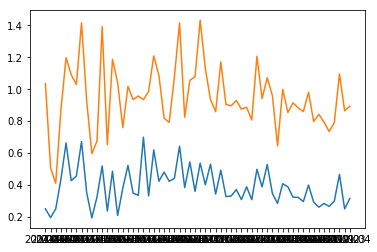

In [164]:
plt.plot(hate_data, ('-'));
plt.plot(negative_emotion_data, ('-'));

In [212]:
negative_emotion_data = exredpill.groupby('year')['negative_emotion'].mean()
hate_data = exredpill.groupby('year')['hate'].mean()
violence_data = exredpill.groupby('year')['violence'].mean()
death_data = exredpill.groupby('year')['death'].mean()
emotions_by_year = pd.DataFrame('emotion'={'negative emotion':negative_emotion_data,'hate':hate_data, 'violence':violence_data, 'death':death_data})

SyntaxError: keyword can't be an expression (<ipython-input-212-8b89c7d72f2e>, line 5)

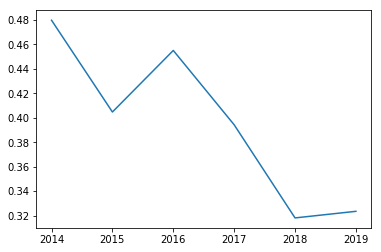

In [186]:
plt.plot(hate_data, ('-'));

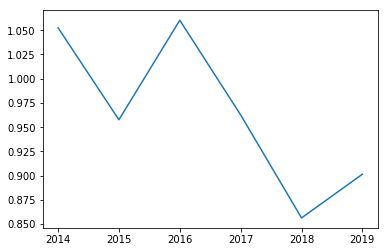

In [187]:
plt.plot(negative_emotion_data, ('-'));

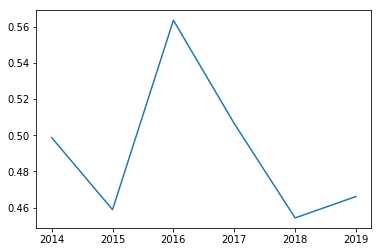

In [190]:
plt.plot(violence_data, ('-'));

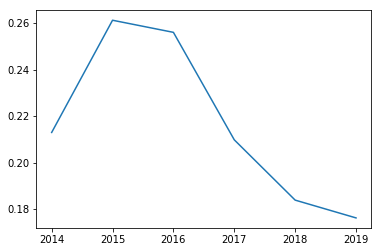

In [191]:
plt.plot(death_data, ('-'));

In [210]:
emotions_by_year


,negative emotion,hate,violence,death
year,,,,
2014,1.052561,0.479784,0.498652,0.212938
2015,0.957647,0.404706,0.458824,0.261176
2016,1.060296,0.455063,0.563519,0.255973
2017,0.962627,0.394254,0.506373,0.209765
2018,0.856408,0.318050,0.454261,0.183851
2019,0.901483,0.323446,0.466102,0.176201


In [211]:
with sns.axes_style('white'):
 g = sns.catplot("year", data=emotions_by_year, aspect=4.0, kind='count')


ValueError: Could not interpret input 'year'